In [2]:
from selenium import webdriver as wb # 통제
from selenium.webdriver.common.keys import Keys # 입력을 위한 컴퓨터용 키보드
from selenium.webdriver.common.by import By # 선택자 선택의 기준
from bs4 import BeautifulSoup as bs
import time
import os # 파일이나 폴더를 생성, 삭제해주는 라이브러리(파일시스템 라이브러리)
# 이미지의 경로를 이미지파일로 변환시켜주는 라이브러리
from urllib.request import urlretrieve
import requests as req
import pandas as pd

In [8]:
url = 'https://blog.naver.com/twonews/222669860261'
res = req.get(url)
soup = bs(res.text, 'lxml')
header = soup.select('.se-oglink-title')

In [9]:
header

[]

In [17]:
driver = wb.Chrome()
driver.get('https://blog.naver.com/PostView.naver?blogId=twonews&logNo=222669860261&redirect=Dlog&widgetTypeCall=true&directAccess=false')

In [18]:
soup = bs(driver.page_source, 'lxml')

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36" lang="ko"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-487018469_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="윤석열 정부 부동산 정책 전망 (뉴스링크 모음)" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMjAzMTFfNyAg/MDAxNjQ2OTgzMzMzMjA1.qUw65einwuKU4BGF3UrbKltHu0BbsOb4BVq-OgE3NGIg.j31zLS86orJedjRESvRgIieT5d3iXrrCQZryV2Ld67gg.JPEG.lu
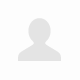
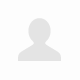

In [19]:
soup

In [14]:
h = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
res = req.get(url, headers = h)
res

<Response [200]>

### 네이버블로그 부동산투자뉴스

In [29]:
# 코드 단일화
# url = 'https://blog.naver.com/twonews/222669860261'
# url은 iFrame이 되어있으므로 실제 주소를 따와서 뽑아내야한다.

h = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
res = req.get(url, headers = h)
url = 'https://blog.naver.com/PostView.naver?blogId=twonews&logNo=222669860261&redirect=Dlog&widgetTypeCall=true&directAccess=false'
res = req.get(url)

soup = bs(res.text, 'lxml')

header = soup.select('.se-oglink-title')

tit = []
for i in range(len(header)):
    tit.append(header[i].text)

In [30]:
tit

['[단독]대출총량규제 풀리나…尹측, 금융위·금감원에 "근거법령 뭐냐"',
 '무주택자, 영끌 나설까… 윤석열 "LTV 80% 완화" - 머니S',
 '\'재건축 풀고, 세금 완화\'…전문가 "집값 떨어진다는데…"',
 '[윤석열 시대] ③부동산 | 연합뉴스',
 '[단독]대출총량규제 풀리나…尹측, 금융위·금감원에 "근거법령 뭐냐"',
 '尹, 대출규제 완화 예고…현행 LTV 어떻길래',
 '윤석열, 취임 직후 왜곡된 부동산시장 정상화 위해 규제 완화 나설 듯',
 '윤석열 당선인, 전월세 시장 안정 위해 임대차3법 개정 추진',
 '文정부 규제대못 뽑는다…임대차3법도 전면 개정 추진',
 '한투 "윤석열 당선, 대형 건설사 수혜…건자재 기업도"',
 '[윤석열 당선] 증시제도 어떻게 바뀌나…주식양도세 폐지·공매도제도 개선',
 '[윤석열 당선] 금융권 인사태풍 예고…금융당국 수장 바뀌나 | 연합뉴스',
 '[윤석열 당선] 가상화폐 활성화 탄력…디지털자산 기본법 추진 | 연합뉴스']